In [1]:
!pip install scikeras

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(7)

import os
from glob import glob
import seaborn as sns
from PIL import Image

from sklearn.metrics import accuracy_score
import itertools
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import Adam, RMSprop

from keras.callbacks import ReduceLROnPlateau
from scikeras.wrappers import KerasClassifier
from keras.applications.resnet50 import ResNet50

In [4]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data='/content/drive/MyDrive/Final Skin Cancer/data'
benign_train = '/content/drive/MyDrive/Final Skin Cancer/data/train/benign'
malignant_train = '/content/drive/MyDrive/Final Skin Cancer/data/test/malignant'

benign_test = '/content/drive/MyDrive/Final Skin Cancer/data/test/benign'
malignant_test = '/content/drive/MyDrive/Final Skin Cancer/data/test/malignant'

In [6]:
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Loading training pictures
image_benign = [read(os.path.join(benign_train, filename)) for filename in os.listdir(benign_train)]
X_benign = np.array(image_benign, dtype='uint8')
image_malignant = [read(os.path.join(malignant_train, filename)) for filename in os.listdir(malignant_train)]
X_malignant = np.array(image_malignant, dtype='uint8')

# Loading testing pictures
ims_benign = [read(os.path.join(benign_test, filename)) for filename in os.listdir(benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(malignant_test, filename)) for filename in os.listdir(malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

In [7]:
# Creating  labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])


# Combine data into splits
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
Y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
Y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

In [8]:
# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]

In [12]:
print("Unique labels for Y_train:", np.unique(Y_train))
print("Shape ofY_train:", Y_train.shape)

print("Unique labels for Y_test:", np.unique(Y_test))
print("Shape of Y_test:", Y_test.shape)


Unique labels for Y_train: [0. 1.]
Shape ofY_train: (1740,)
Unique labels for Y_test: [0. 1.]
Shape of Y_test: (660,)


In [9]:
X_train = X_train/255.
X_test = X_test/255.

In [10]:
Y_test = to_categorical(Y_test, num_classes= 2)
Y_train = to_categorical(Y_train, num_classes= 2)


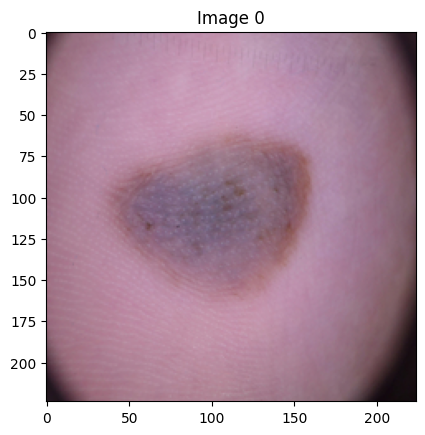

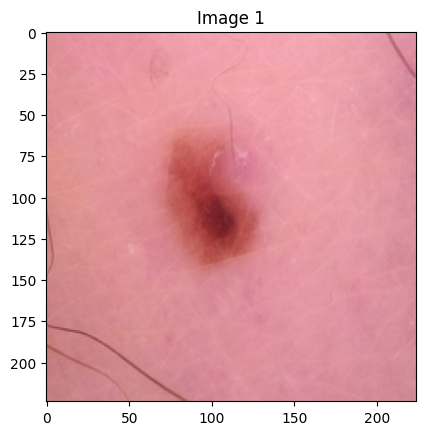

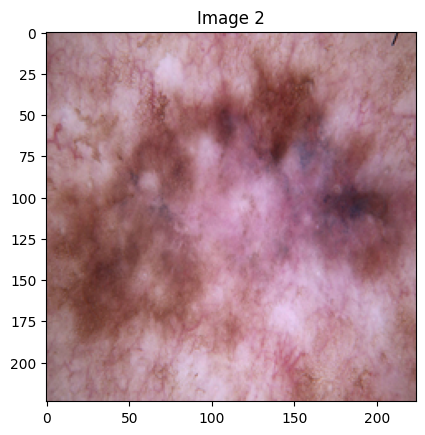

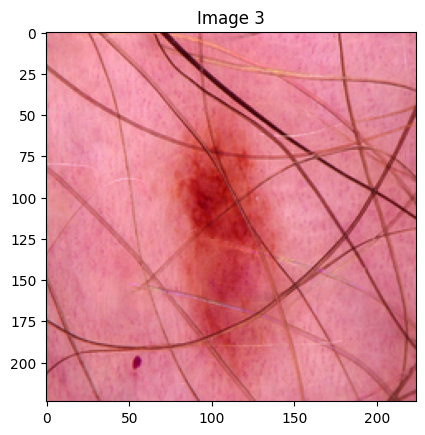

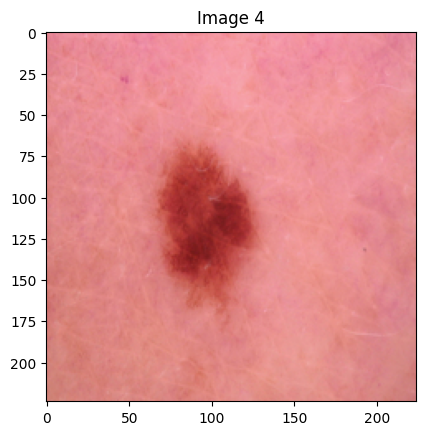

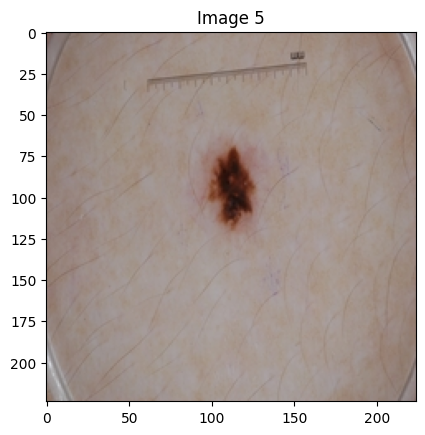

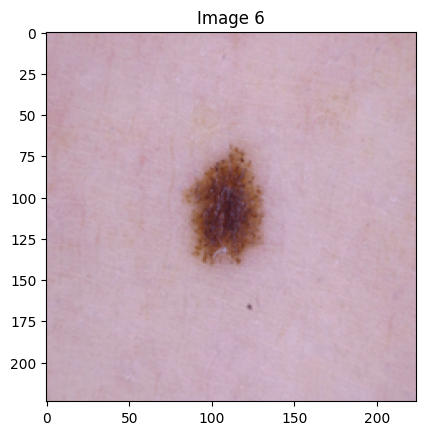

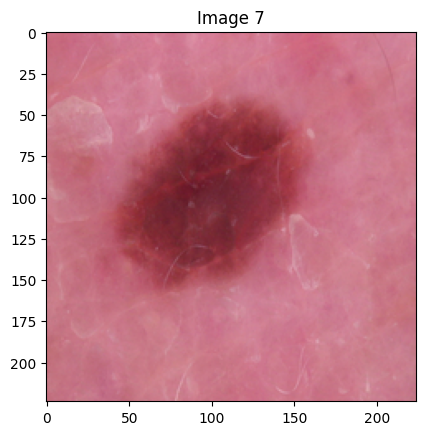

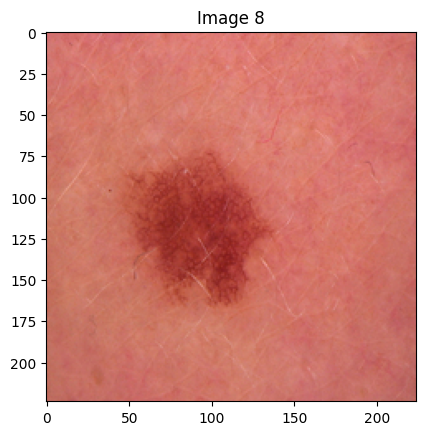

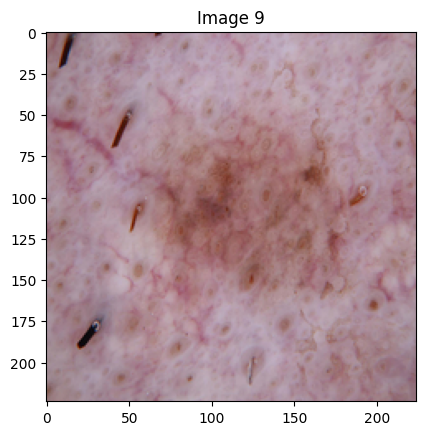

In [11]:
num_images = 10

for i in range(num_images):
    plt.imshow(X_train[i])
    plt.title(f"Image {i}")  # Set a title with the image index
    plt.show()


 **TRAINING USING RESNET MODEL BUT WITHOUT THE PRETRAINED WEIGHTS**

In [12]:
#Declaring the variables for the model e.g learning rate, batch size, epochs etc
learning_rate=1.e-5
epochs=50
batch_size=32
input_shape= (224,224,3)

In [13]:
#ReduceLROnPlateau instance so we can monitor accuracy and adjust the learning rate if accuracy stops improving
adjust_rate=ReduceLROnPlateau(monitor='val_accuracy',patience=4,factor=0.5,min_lr=1.e-7)

In [14]:
model = ResNet50(include_top=True,
                 weights= None,
                 input_tensor=None,
                 input_shape=input_shape,
                 pooling='avg',
                 classes=2)


In [15]:
model.compile(optimizer = Adam(learning_rate) ,
              loss = "binary_crossentropy",
              metrics=["accuracy"])

In [16]:
f_model= model.fit(X_train,Y_train, validation_split=0.2,
                    epochs= epochs, batch_size= batch_size, verbose=2,
                    callbacks=[adjust_rate]
                   )

Epoch 1/50
44/44 - 44s - loss: 0.6945 - accuracy: 0.6868 - val_loss: 0.5695 - val_accuracy: 0.8420 - lr: 1.0000e-05 - 44s/epoch - 991ms/step
Epoch 2/50
44/44 - 5s - loss: 0.3827 - accuracy: 0.8348 - val_loss: 0.4537 - val_accuracy: 0.8420 - lr: 1.0000e-05 - 5s/epoch - 115ms/step
Epoch 3/50
44/44 - 5s - loss: 0.3493 - accuracy: 0.8412 - val_loss: 0.4526 - val_accuracy: 0.8420 - lr: 1.0000e-05 - 5s/epoch - 114ms/step
Epoch 4/50
44/44 - 5s - loss: 0.3441 - accuracy: 0.8420 - val_loss: 0.5316 - val_accuracy: 0.8420 - lr: 1.0000e-05 - 5s/epoch - 114ms/step
Epoch 5/50
44/44 - 5s - loss: 0.3029 - accuracy: 0.8592 - val_loss: 0.6702 - val_accuracy: 0.8420 - lr: 1.0000e-05 - 5s/epoch - 114ms/step
Epoch 6/50
44/44 - 5s - loss: 0.2890 - accuracy: 0.8757 - val_loss: 0.7381 - val_accuracy: 0.8420 - lr: 5.0000e-06 - 5s/epoch - 114ms/step
Epoch 7/50
44/44 - 5s - loss: 0.2970 - accuracy: 0.8642 - val_loss: 0.7593 - val_accuracy: 0.8420 - lr: 5.0000e-06 - 5s/epoch - 114ms/step
Epoch 8/50
44/44 - 5s - l

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


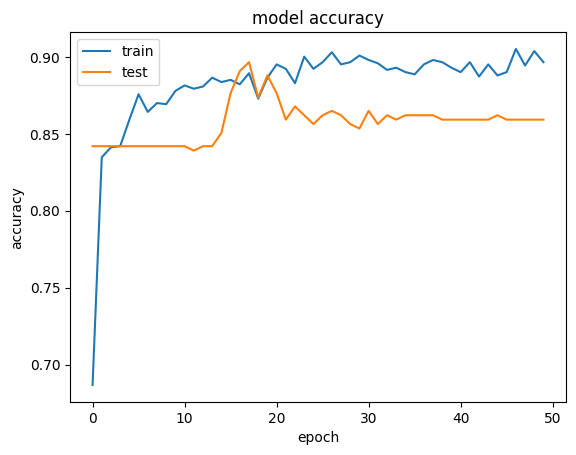

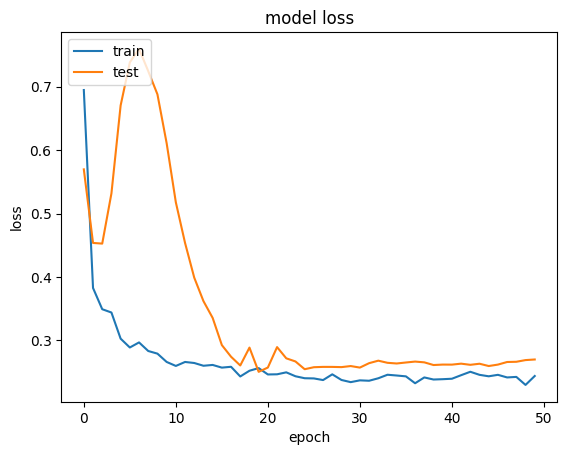

In [17]:
print(f_model.history.keys())
# summarize history for accuracy
plt.plot(f_model.history['accuracy'])
plt.plot(f_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(f_model.history['loss'])
plt.plot(f_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**TESTING AND EVALUATING THE MODEL**

In [20]:
print("Training Accuracy: ", f_model.history['accuracy'][-1])
print("Validation Accuracy:", f_model.history['val_accuracy'][-1])

Training Accuracy:  0.8965517282485962
Validation Accuracy: 0.8591954112052917


In [28]:
model.save('/content/drive/MyDrive/Final Skin Cancer/skin_cancer_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
model.save_weights('/content/drive/MyDrive/Final Skin Cancer/skin_cancer_model.h5')
model.save('/content/drive/MyDrive/Final Skin Cancer/skin_cancer_model.keras')

In [24]:
import cv2

In [25]:
classes = {0:'benign',
              1:'malignant'}

In [31]:
image_path='/content/drive/MyDrive/Final Skin Cancer/test/benign/98.jpg'
if os.path.exists(image_path):
    print("Image file exists.")
else:
    print("Image file doesn't exist or the path is incorrect.")

Image file exists.


1/1 [==============================] - 1s 1s/step
prediction:  malignant


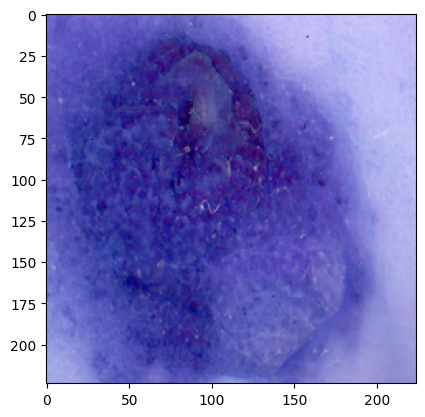

In [34]:
test_image = cv2.imread(image_path)

if test_image is not None:
   test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
   plt.imshow(test_image)
   test_image = np.expand_dims(test_image,axis=0)
   probability = model.predict(test_image)
   pred_class = np.argmax(probability)

   pred_class = classes[pred_class]

   print('prediction: ',pred_class)
else:
    print("Error: Failed to read the image.")